In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline
sns.set_context('notebook',font_scale=1.5)

In [2]:
import pickle
from sklearn.cross_validation import train_test_split

In [3]:
import sys
#alter the line below to correspond to your file system
ncaa_dir = '/Users/nickc/Documents/ncaa_kaggle'
sys.path.append(ncaa_dir)

In [4]:
import ncaa_kaggle.ncaa_model as md

# Import some of the data and check the stats on it
F and T below will both have length 13 and contain dictionaries of the stats

In [10]:
F, T = pickle.load( open( "../data/year_stats.p", "rb" ) )

In [11]:
#'efg_1', 'de_1', 'oe_1', 'efg_2', 'de_2','oe_2'

In [12]:
print list(F[0].keys()) #available stats for 2013

['rpi_1', 'win_perc2_1', 'win_perc3_1', 'fga3_1', 'fga_1', 'fta_1', 'to_1', 'score_1', 'pf_1', 'blk_1', 'eftr_1', 'ftm_1', 'efg_1', 'fgm3_1', 'ast_1', 'de_1', 'fgm_1', 'dr_1', 'poss_1', 'stl_1', 'oe_1', 'eto_1', 'eor_1', 'win_perc_1', 'or_1', 'rpi_2', 'win_perc2_2', 'win_perc3_2', 'fga3_2', 'fga_2', 'fta_2', 'to_2', 'score_2', 'pf_2', 'blk_2', 'eftr_2', 'ftm_2', 'efg_2', 'fgm3_2', 'ast_2', 'de_2', 'fgm_2', 'dr_2', 'poss_2', 'stl_2', 'oe_2', 'eto_2', 'eor_2', 'win_perc_2', 'or_2']


In [13]:
F_merged = F[0]
T_merged = T[0]
for ii in range(1,9):
    F_merged = F_merged.append(F[ii])
    T_merged = T_merged.append(T[ii])

In [14]:
F_merged.shape

(1158, 50)

# Visualize the data - Just RPI

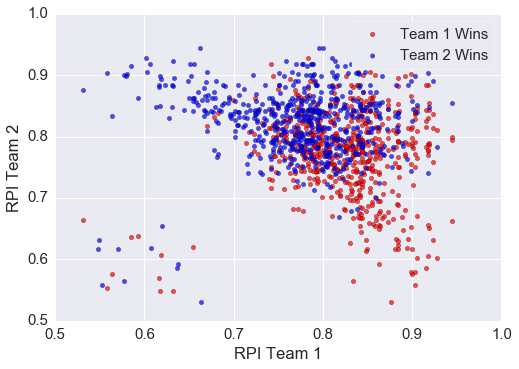

In [15]:
fig,ax = plt.subplots()
t1_win = (T_merged==1.).values.ravel()
ax.scatter(F_merged['rpi_1'][t1_win],F_merged['rpi_2'][t1_win],
           c = 'r',label='Team 1 Wins',alpha=.7)
ax.scatter(F_merged['rpi_1'][~t1_win],F_merged['rpi_2'][~t1_win],
           c = 'b',label='Team 2 Wins',alpha=.7)
ax.set_xlabel('RPI Team 1')
ax.set_ylabel('RPI Team 2')
ax.legend(frameon=True,)
#fig.savefig('../figures/rpi_scatter.png',bbox_inches='tight')

# Visualize the decision boundary for RPI

In [16]:
from sklearn import linear_model

In [17]:
F = F_merged[['rpi_1','rpi_2']].values
T = T_merged.values.ravel()
X_train, X_test, y_train, y_test = train_test_split(F, T,
    test_size=0.33,random_state=None)

# create the regression object
logregr = linear_model.LogisticRegression()

# train the model
logregr.fit(X_train, y_train)

preds = logregr.predict(X_test)
score = logregr.score(X_test,y_test)
proba = logregr.predict_proba(X_test)[:,1]

logloss = md.log_loss(proba,y_test)
adjlog = md.adj_log_loss(proba,y_test)

In [18]:
reload(md)

<module 'ncaa_kaggle.ncaa_model' from '/Users/nickc/Documents/ncaa_kaggle/ncaa_kaggle/ncaa_model.pyc'>

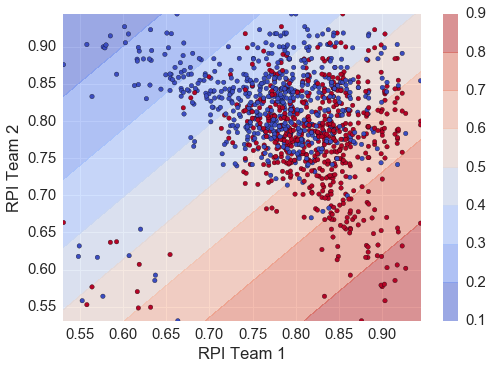

In [19]:
md.visualize_boundary_2d(F,T,classifier=logregr)
plt.xlabel('RPI Team 1')
plt.ylabel('RPI Team 2')
#plt.savefig('../figures/decision_boundary.png')

# Use a bunch of data and iterate it
We want to see how robust the model is

In [20]:
f_names = [ 'win_perc2_1', 'win_perc3_1', 'win_perc_1', 'efg_1', 'de_1', 'oe_1',
           'win_perc2_2', 'win_perc3_2', 'win_perc_2','efg_2', 'de_2','oe_2']

In [22]:
scores = []
logloss = []
adjlog = []
for ii in range(10000):
    pr,sc,prob,lg,adj = md.logistic_regression(F_merged[f_names],T_merged.values.ravel())
    scores.append(sc)
    logloss.append(lg)
    adjlog.append(adj)

In [23]:
sc_mean = np.around(np.mean(scores),decimals=3)
sc_std = np.around(np.std(scores),decimals=3)
sc_text1 = '$\mu$ = ' + str(sc_mean)
sc_text2 = '$\sigma$ = ' + str(sc_std)

ll_mean = np.around(np.mean(logloss),decimals=3)
ll_std = np.around(np.std(logloss),decimals=3)
ll_text1 = '$\mu$ = ' + str(ll_mean)
ll_text2 = '$\sigma$ = ' + str(sc_std)

adj_ll_mean = np.around(np.mean(adjlog),decimals=3)
adj_ll_std = np.around(np.std(adjlog),decimals=3)

adj_text1 = '$\mu$ = ' + str(adj_ll_mean)
adj_text2 = '$\sigma$ = ' + str(adj_ll_std)

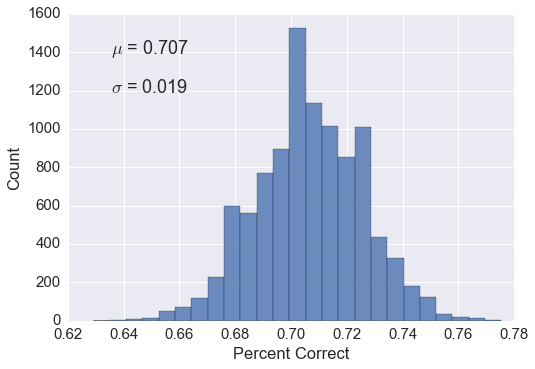

In [24]:
fig,ax = plt.subplots()
ax.hist(scores,bins=25,alpha=.8);
fig.text(.2,.8,str(sc_text1))
fig.text(.2,.7,str(sc_text2))
plt.xlabel('Percent Correct')
plt.ylabel('Count')
#plt.savefig('../figures/score_distribution.png',bbox_inches='tight')

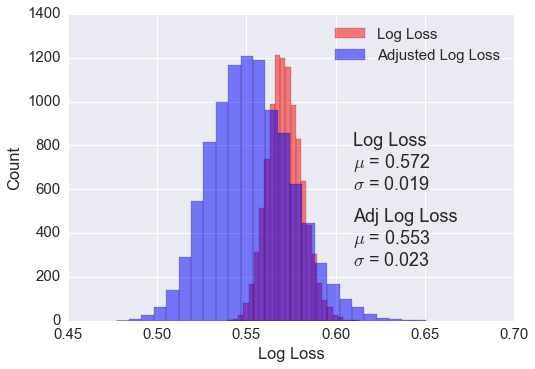

In [25]:
plt.hist(logloss,color='r',bins=25,alpha=.5,label='Log Loss');
plt.hist(adjlog,color='b',bins=25,alpha=.5,label='Adjusted Log Loss');
plt.legend()
plt.xlabel('Log Loss')
plt.ylabel('Count')

plt.text(.61,800,'Log Loss')
plt.text(.61,700,str(ll_text1))
plt.text(.61,600,str(ll_text2))

plt.text(.61,450,'Adj Log Loss')
plt.text(.61,350,str(adj_text1))
plt.text(.61,250,str(adj_text2))

#plt.savefig('../figures/log_loss_distribution.png',bbox_inches='tight')

# Visualize it While the tournament is going on

In [1]:
import sys
#alter the line below to correspond to your file system
ncaa_dir = '/Users/nickc/Documents/ncaa_kaggle'
sys.path.append(ncaa_dir)

In [2]:
%matplotlib inline

In [3]:
import ncaa_kaggle.ncaa_bracket_maker as bm

IDs matched
Left and Right organized!
probabilities calculated!
IDs matched
Left and Right organized!
probabilities calculated!
IDs matched
Left and Right organized!
probabilities calculated!
IDs matched
Left and Right organized!
probabilities calculated!
round 1 printed
round 2 printed!
round 3 printed!
round 4 printed!
call .fig to get the bracket!


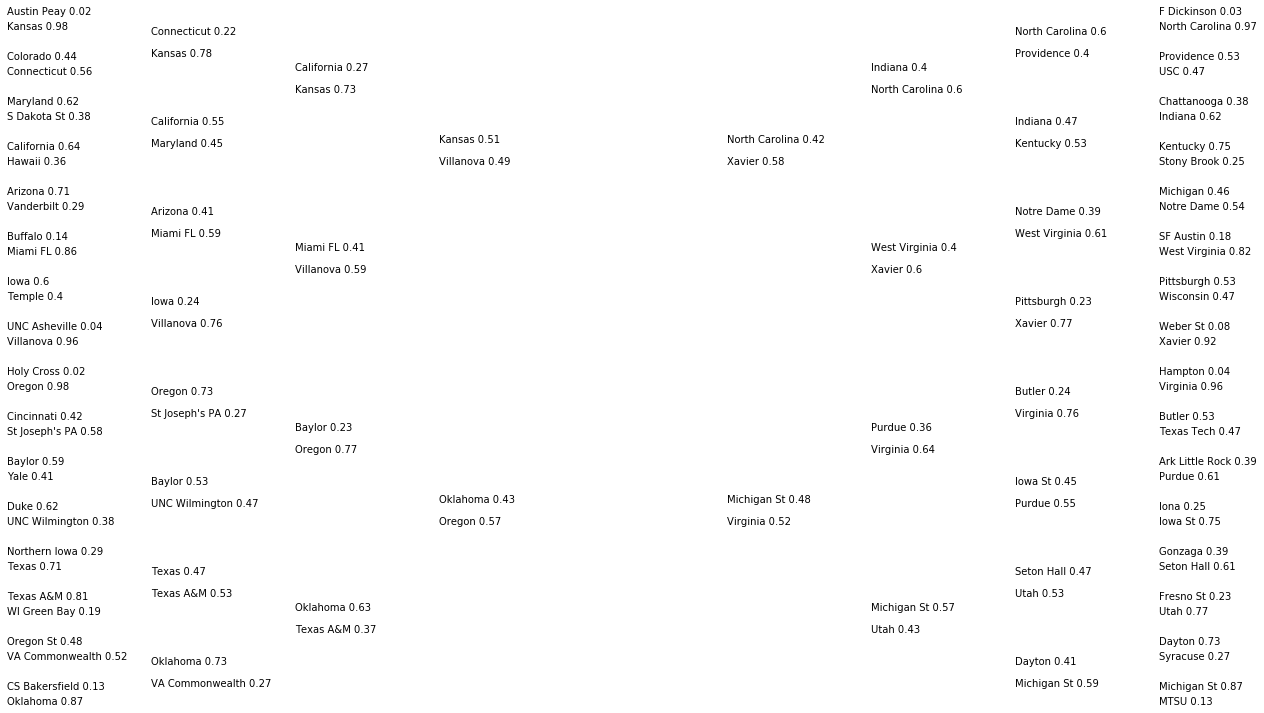

In [6]:
brack = bm.bracket_create('../data/submission_one.csv')
fig = brack.draw_everything()

In [8]:
fig = brack.fig

In [9]:
fig.savefig('../figures/my_bracket.png',bbox_inches='tight')

# Get the final score distribution

In [ ]:
import sys
#alter the line below to correspond to your file system
ncaa_dir = '/Users/nickc/Documents/ncaa_kaggle'
sys.path.append(ncaa_dir)

In [19]:
reload(wb)

<module 'ncaa_kaggle.rpi_web' from '/Users/nickc/Documents/ncaa_kaggle/ncaa_kaggle/rpi_web.py'>

In [20]:
import ncaa_kaggle.rpi_web as wb

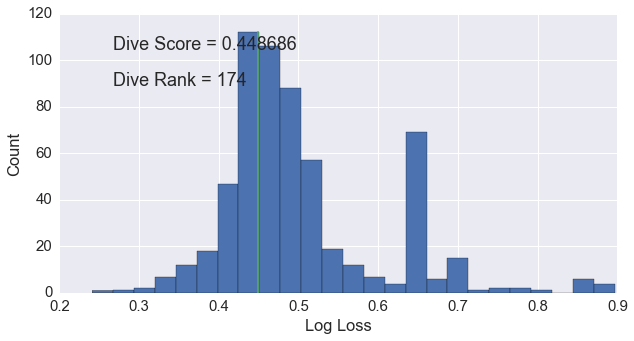

In [21]:
f = wb.draw_histogram()

In [22]:
f.savefig('../figures/kaggle_hist.png',bbox_inches='tight')